In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

In [47]:
data = pd.read_csv("datasets/Countryclusters.csv")
print(data.head())

   Country  Latitude  Longitude Language
0      USA     44.97    -103.77  English
1   Canada     62.40     -96.80  English
2   France     46.75       2.40   French
3       UK     54.01      -2.53  English
4  Germany     51.15      10.40   German


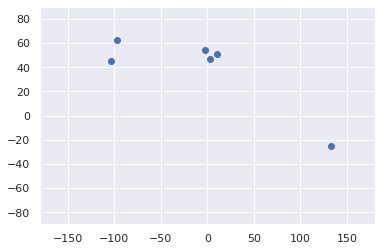

In [48]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [49]:
x = data.iloc[:, 1:3]
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [50]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [51]:
data_with_clusters = data.copy()
data_with_clusters["Clusters"] = identified_clusters

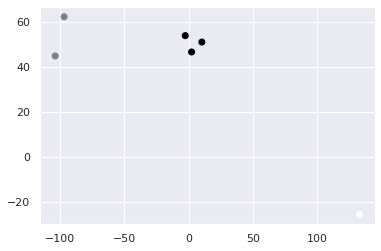

In [52]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap=ListedColormap(['#000000','#7F7F7F','white']))

In [53]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

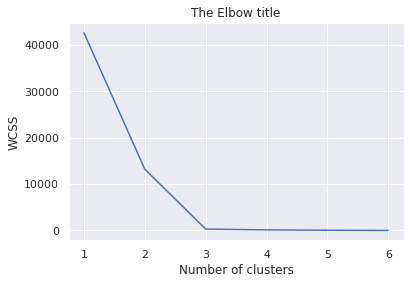

In [54]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')